In [72]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화

#Graph
import plotly 
plotly.tools.set_credentials_file(username='Sherryjeon', api_key='3fCTh7mmnI03FNIYxsFO')
from plotly.graph_objs import *

import plotly.plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale


In [73]:
#import train set
loan = pickle.load( open( "pickle/X_train", "rb" ) ) # this set includes y as well


In [74]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
30690,503151,2100.0,2100.0,2100.000000,36 months,6.39,64.27,A,A1,"Aerotek, Inc.",...,0.0,0.0,0.0,0.0,0.0,29543.592078,0.0,0.0,0.0,0
101060,6814862,3000.0,3000.0,3000.000000,36 months,12.35,100.15,B,B4,alpha natural resources,...,0.0,0.0,0.0,0.0,0.0,26700.000000,0.0,0.0,0.0,0
168535,3219064,12000.0,12000.0,12000.000000,36 months,11.14,393.67,B,B2,City of Mission,...,0.0,0.0,0.0,0.0,0.0,15000.000000,0.0,0.0,0.0,0
139340,4424694,21725.0,21725.0,21725.000000,36 months,11.14,712.69,B,B2,HARLAN CHECK CASHING FINANCIAL SERVICES,...,0.0,0.0,0.0,0.0,0.0,33000.000000,0.0,0.0,0.0,0
163202,3414601,15250.0,15250.0,15250.000000,36 months,13.11,514.65,B,B4,Duluth transit authority,...,0.0,0.0,0.0,0.0,0.0,24100.000000,0.0,0.0,0.0,1
770438,46764111,35000.0,35000.0,35000.000000,60 months,19.52,917.97,E,E3,Senior Business Relationship Manager,...,0.0,0.0,0.0,0.0,0.0,87350.000000,0.0,0.0,0.0,0
182002,2306454,25000.0,25000.0,25000.000000,36 months,19.05,917.04,D,D4,Bylight,...,0.0,0.0,0.0,0.0,0.0,33500.000000,0.0,0.0,0.0,1
326399,23876062,35000.0,35000.0,35000.000000,60 months,24.08,1008.51,F,F2,Logistics Officer,...,0.0,0.0,0.0,0.0,0.0,45000.000000,0.0,0.0,0.0,1
441884,11995544,14000.0,14000.0,13975.000000,36 months,11.99,464.94,B,B3,SHIPPING,...,0.0,0.0,0.0,0.0,0.0,24100.000000,0.0,0.0,0.0,1
189996,1626888,10800.0,10800.0,10800.000000,36 months,15.31,376.03,C,C2,"Rapid Plumbing Service, Inc.",...,0.0,0.0,0.0,0.0,0.0,18600.000000,0.0,0.0,0.0,0


In [75]:

print (loan.shape)

(203165, 58)


# 1. Categorical Features

## 1-1) term
* The number of payments on the loan. Values are in months and can be either 36 or 60.
* changed to one-hot-encoding


In [76]:
print (loan.term.value_counts())



 36 months    156097
 60 months     47068
Name: term, dtype: int64


In [77]:
# one-hot-encoding
loan_check= pd.get_dummies(loan['term'], prefix='term')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status,term_ 36 months,term_ 60 months
4343,1004123,12000.0,12000.0,12000.0,36 months,11.71,396.92,B,B3,Lockheed Martin,...,0.0,0.0,0.0,29543.592078,0.0,0.0,0.0,0,1,0
171132,3162621,20000.0,20000.0,19800.0,36 months,12.12,665.44,B,B3,McGraw-hill companies,...,0.0,0.0,0.0,14000.000000,0.0,0.0,0.0,0,1,0
426521,12806896,8475.0,8475.0,8475.0,36 months,18.92,310.32,D,D4,Web Developer,...,0.0,0.0,0.0,20500.000000,0.0,0.0,0.0,0,1,0
54747,8998391,15000.0,15000.0,15000.0,36 months,17.10,535.54,C,C5,Deli/Cashier,...,0.0,0.0,0.0,14200.000000,0.0,0.0,0.0,0,1,0
58657,9001675,16000.0,16000.0,16000.0,36 months,15.10,555.43,C,C2,Purchaing Agenet,...,0.0,0.0,0.0,21400.000000,0.0,0.0,0.0,1,1,0


In [78]:
loan.drop('term', axis=1, inplace=True)

## 1-2) grade & subgrade

### (1) sub-grade

In [79]:
# Calculator with loan_status
loan_check = pd.DataFrame(loan.groupby(['grade', 'sub_grade', 'loan_status']).size())
loan_check = loan_check.reset_index()
loan_check = loan_check.pivot('sub_grade', 'loan_status', 0)
#loan_check['percentage'] = loan_check['1'] / loan_check.sum()
loan_check.reset_index(inplace = True)
loan_check.rename(columns={1:'default', 0: 'paid'}, inplace=True)
loan_check.head()

loan_status,sub_grade,paid,default
0,A1,4291,177
1,A2,4462,274
2,A3,5037,364
3,A4,7768,720
4,A5,8299,978


In [80]:
loan_check['grade_percentage'] = loan_check.paid / (loan_check.default + loan_check.paid)
loan_check.tail()# 각 sub_grade별 상환 비율


loan_status,sub_grade,paid,default,grade_percentage
30,G1,326,305,0.516640
31,G2,242,211,0.534216
32,G3,157,171,0.478659
33,G4,131,90,0.592760
34,G5,105,113,0.481651


In [81]:
# sub_grade의 값을 비율로 변환
loan['sub_grade'] = loan['sub_grade'].replace({'A1':loan_check['grade_percentage'][loan_check.sub_grade =='A1'].values,
                                              'A2':loan_check['grade_percentage'][loan_check.sub_grade =='A2'].values,
                                              'A3':loan_check['grade_percentage'][loan_check.sub_grade =='A3'].values,
                                              'A4':loan_check['grade_percentage'][loan_check.sub_grade =='A4'].values,
                                              'A5':loan_check['grade_percentage'][loan_check.sub_grade =='A5'].values,
                                              'B1':loan_check['grade_percentage'][loan_check.sub_grade =='B1'].values,
                                              'B2':loan_check['grade_percentage'][loan_check.sub_grade =='B2'].values,
                                              'B3':loan_check['grade_percentage'][loan_check.sub_grade =='B3'].values,
                                              'B4':loan_check['grade_percentage'][loan_check.sub_grade =='B4'].values,
                                              'B5':loan_check['grade_percentage'][loan_check.sub_grade =='B5'].values,
                                              'C1':loan_check['grade_percentage'][loan_check.sub_grade =='C1'].values,
                                              'C2':loan_check['grade_percentage'][loan_check.sub_grade =='C2'].values,
                                              'C3':loan_check['grade_percentage'][loan_check.sub_grade =='C3'].values,
                                              'C4':loan_check['grade_percentage'][loan_check.sub_grade =='C4'].values,
                                              'C5':loan_check['grade_percentage'][loan_check.sub_grade =='C5'].values,
                                              'D1':loan_check['grade_percentage'][loan_check.sub_grade =='D1'].values,
                                              'D2':loan_check['grade_percentage'][loan_check.sub_grade =='D2'].values,
                                              'D3':loan_check['grade_percentage'][loan_check.sub_grade =='D3'].values,
                                              'D4':loan_check['grade_percentage'][loan_check.sub_grade =='D4'].values,
                                              'D5':loan_check['grade_percentage'][loan_check.sub_grade =='D5'].values,
                                              'E1':loan_check['grade_percentage'][loan_check.sub_grade =='E1'].values,
                                              'E2':loan_check['grade_percentage'][loan_check.sub_grade =='E2'].values,
                                              'E3':loan_check['grade_percentage'][loan_check.sub_grade =='E3'].values,
                                              'E4':loan_check['grade_percentage'][loan_check.sub_grade =='E4'].values,
                                              'E5':loan_check['grade_percentage'][loan_check.sub_grade =='E5'].values,
                                              'F1':loan_check['grade_percentage'][loan_check.sub_grade =='F1'].values,
                                              'F2':loan_check['grade_percentage'][loan_check.sub_grade =='F2'].values,
                                              'F3':loan_check['grade_percentage'][loan_check.sub_grade =='F3'].values,
                                              'F4':loan_check['grade_percentage'][loan_check.sub_grade =='F4'].values,
                                              'F5':loan_check['grade_percentage'][loan_check.sub_grade =='F5'].values,
                                              'G1':loan_check['grade_percentage'][loan_check.sub_grade =='G1'].values,
                                              'G2':loan_check['grade_percentage'][loan_check.sub_grade =='G2'].values,
                                              'G3':loan_check['grade_percentage'][loan_check.sub_grade =='G3'].values,
                                              'G4':loan_check['grade_percentage'][loan_check.sub_grade =='G4'].values,
                                              'G5':loan_check['grade_percentage'][loan_check.sub_grade =='G5'].values})


### (2) grade

In [82]:
#One-hot-encoding


loan_check= pd.get_dummies(loan['grade'], prefix='grade')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,B,0.848689,Lockheed Martin,2 years,...,0,1,0,0,1,0,0,0,0,0
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,B,0.848689,McGraw-hill companies,5 years,...,0,1,0,0,1,0,0,0,0,0
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,D,0.649399,Web Developer,10+ years,...,0,1,0,0,0,0,1,0,0,0
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,C,0.716210,Deli/Cashier,10+ years,...,0,1,0,0,0,1,0,0,0,0
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,C,0.778796,Purchaing Agenet,10+ years,...,1,1,0,0,0,1,0,0,0,0


In [83]:
loan.drop('grade', axis=1, inplace = True)

## 1-3) home_ownership

In [84]:
loan.home_ownership.value_counts()

MORTGAGE    99532
RENT        85676
OWN         17792
OTHER         127
NONE           37
ANY             1
Name: home_ownership, dtype: int64

In [85]:
#One-hot-encoding


loan_check= pd.get_dummies(loan['home_ownership'], prefix='home')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,grade_D,grade_E,grade_F,grade_G,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2 years,RENT,...,0,0,0,0,0,0,0,0,0,1
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5 years,RENT,...,0,0,0,0,0,0,0,0,0,1
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10+ years,RENT,...,1,0,0,0,0,0,0,0,0,1
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10+ years,MORTGAGE,...,0,0,0,0,0,1,0,0,0,0
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10+ years,RENT,...,0,0,0,0,0,0,0,0,0,1


In [86]:
loan.drop('home_ownership', axis=1, inplace=True)

## 1-4) emp_length

In [87]:

loan['emp_length'].value_counts()

10+ years    61479
2 years      18999
< 1 year     17005
3 years      16384
5 years      14384
1 year       13576
4 years      12979
6 years      11724
7 years      11263
8 years       9480
n/a           8128
9 years       7764
Name: emp_length, dtype: int64

In [88]:
loan['emp_length']= loan['emp_length'].replace({'10+ years':10, '2 years':2, '3 years':3,
                                                                 '5 years':5, '1 year':1, '4 years':4,
                                                                 '6 years':6, '7 years':7, '8 years': 8,
                                                                 '9 years': 9, '< 1 year': 1, 'n/a':0})#._update_inplace(loan_col_real['emp_length'])

In [89]:
loan['emp_length']

30690      1
101060     4
168535     5
139340     6
163202     5
770438    10
182002     3
326399    10
441884     8
189996    10
743254    10
78944      7
4658       5
753720     1
888        7
327623     1
191596    10
151951     0
380288     0
367796    10
372348    10
250587     1
110711     3
295612     0
373191     7
171489     1
251236     1
94600      2
140066     8
725705     2
          ..
329998    10
110265     4
456551     4
38477      8
155078     7
75386     10
196986    10
656263     1
747537     4
383673     6
13351      8
35424      1
425361    10
14517      5
408163     2
440396     6
34818      2
68341      6
42384      1
859243     8
25528      5
91646      4
18277      4
229955    10
253101     8
4343       2
171132     5
426521    10
54747     10
58657     10
Name: emp_length, Length: 203165, dtype: int64

In [90]:
#And, check relationship with emp_length and annual_inc

loan_check = loan[['emp_length', 'annual_inc']]
loan_check_inc = loan_check.groupby('emp_length').mean()

In [91]:
loan_check_inc.reset_index(inplace=True)
loan_check_inc

,emp_length,annual_inc
0,0,47969.955389
1,1,67266.308913
2,2,70008.602745
3,3,70812.048165
4,4,69765.991235
5,5,71294.267054
6,6,71431.280815
7,7,72895.635531
8,8,74238.551182
9,9,74638.035644


In [92]:
#visualize

trace_sub_grade = Bar(x=loan_check_inc.emp_length,
                  y=loan_check_inc.annual_inc,
                  
                  marker=dict(color='#ffcdd2'))



data = [trace_sub_grade]
layout = Layout(title="Relationship between emp_length & annual_inc",
                xaxis=dict(title='emp_length'),
                yaxis=dict(title='average of annual_inc'))
fig = Figure(data=data, layout=layout)

plotly.offline.plot(fig)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

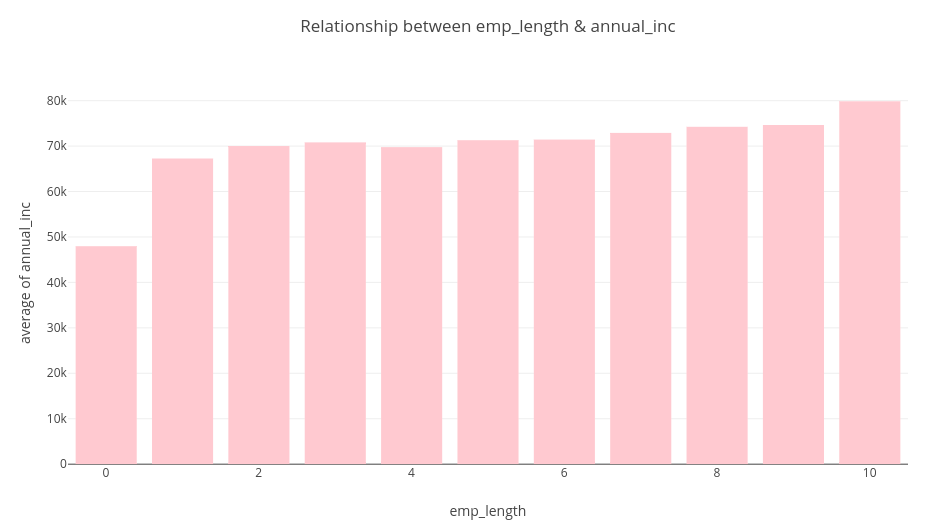

In [93]:
# Normalize these average and weight to emp_length

loan_check_inc['norm'] = pd.DataFrame(normalize(loan_check_inc.annual_inc).reshape(-1,1))
loan_check_inc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



,emp_length,annual_inc,norm
0,0,47969.955389,0.205355
1,1,67266.308913,0.287961
2,2,70008.602745,0.299701
3,3,70812.048165,0.303140
4,4,69765.991235,0.298662
5,5,71294.267054,0.305205
6,6,71431.280815,0.305791
7,7,72895.635531,0.312060
8,8,74238.551182,0.317809
9,9,74638.035644,0.319519


In [94]:

loan_desc_list = loan['emp_length'].tolist()  # 최초 신용거래 시작일


for i in range(0, len(loan_desc_list)):

    if loan_desc_list[i] == 0:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][0]
    elif loan_desc_list[i] == 1:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][1]
    elif loan_desc_list[i] == 2:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][2]
    elif loan_desc_list[i] == 3:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][3]
    elif loan_desc_list[i] == 4:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][4]
    elif loan_desc_list[i] == 5:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][5]
    elif loan_desc_list[i] == 6:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][6]
    elif loan_desc_list[i] == 7:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][7]
    elif loan_desc_list[i] == 8:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][8]
    elif loan_desc_list[i] == 9:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][9]
    elif loan_desc_list[i] == 10:
        loan_desc_list[i] = loan_desc_list[i]*loan_check_inc['norm'][10]

        
loan['term'] = loan_desc_list    


## 1-5) verification_status

In [95]:
print (loan.verification_status.value_counts())

Verified           74372
Not Verified       68380
Source Verified    60413
Name: verification_status, dtype: int64


In [96]:
#One-hot-encoding


loan_check= pd.get_dummies(loan['verification_status'], prefix='veri')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,...,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term,veri_Not Verified,veri_Source Verified,veri_Verified
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2,77000.0,...,0,0,0,0,0,1,0.599401,1,0,0
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5,80000.0,...,0,0,0,0,0,1,1.526023,0,0,1
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10,22500.0,...,0,0,0,0,0,1,3.418477,0,0,1
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10,38000.0,...,0,1,0,0,0,0,3.418477,0,0,1
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10,78000.0,...,0,0,0,0,0,1,3.418477,1,0,0


In [97]:
loan.drop('verification_status', axis=1, inplace=True)

## 1-6) pymnt_plan

In [98]:
loan.pymnt_plan.value_counts()

n    203160
y         5
Name: pymnt_plan, dtype: int64

In [99]:
#One-hot-encoding


loan_check= pd.get_dummies(loan['pymnt_plan'], prefix='plan')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,...,home_NONE,home_OTHER,home_OWN,home_RENT,term,veri_Not Verified,veri_Source Verified,veri_Verified,plan_n,plan_y
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2,77000.0,...,0,0,0,1,0.599401,1,0,0,1,0
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5,80000.0,...,0,0,0,1,1.526023,0,0,1,1,0
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10,22500.0,...,0,0,0,1,3.418477,0,0,1,1,0
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10,38000.0,...,0,0,0,0,3.418477,0,0,1,1,0
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10,78000.0,...,0,0,0,1,3.418477,1,0,0,1,0


In [100]:
loan.drop('pymnt_plan', axis=1, inplace=True)

## 1-7)url
* There is no meaning of url, so, delete it

In [101]:
loan.drop('url', axis=1, inplace = True)

## 1-8) zip_code & addr_state

In [102]:
# There is too many values with zip_code, this feature will be dropped.
loan.drop('zip_code', axis = 1, inplace = True)

#### checking addr_state with 'dti' , 'emp_length', 'annual_inc', 'funded_amnt'

In [103]:
loan_check = loan[['addr_state','dti' , 'emp_length', 'annual_inc', 'funded_amnt']]

In [104]:
loan_check = loan_check.groupby('addr_state').mean()

In [105]:
loan_check.reset_index(inplace = True)

In [106]:
loan_check.head()

,addr_state,dti,emp_length,annual_inc,funded_amnt
0,AK,17.565338,6.043233,76012.132481,15567.528195
1,AL,18.312204,5.966849,65768.783381,13349.551482
2,AR,18.652748,5.805139,63611.473255,12676.106353
3,AZ,16.616731,5.350122,69332.874763,13128.165783
4,CA,15.591603,5.646072,76452.826180,13645.587550


In [107]:
#Scaling

loan_check = loan_check.join(pd.DataFrame(-scale([loan_check.dti, loan_check.emp_length,
                                                        loan_check.annual_inc, loan_check.funded_amnt])).T)
#negative values to make graph easy to read

In [108]:
loan_check = loan_check.rename(columns = {0:'scaled_dti',
                  1:'scaled_emp',
                  2:'scaled_inc',
                  3: 'scaled_amnt'})
loan_check.head()

,addr_state,dti,emp_length,annual_inc,funded_amnt,scaled_dti,scaled_emp,scaled_inc,scaled_amnt
0,AK,17.565338,6.043233,76012.132481,15567.528195,0.730755,0.731123,-1.696059,0.234182
1,AL,18.312204,5.966849,65768.783381,13349.551482,0.729395,0.729851,-1.696732,0.237486
2,AR,18.652748,5.805139,63611.473255,12676.106353,0.726734,0.727224,-1.698062,0.244105
3,AZ,16.616731,5.350122,69332.874763,13128.165783,0.719688,0.720082,-1.701481,0.261711
4,CA,15.591603,5.646072,76452.826180,13645.587550,0.711890,0.712204,-1.705011,0.280917


In [109]:
# Visualize
trace_dti = Bar(x=loan_check.addr_state,
                  y=loan_check.scaled_dti,
                  name='dti',
                  marker=dict(color='#ffcdd2'))

trace_emp_length = Bar(x=loan_check.addr_state,
                y=loan_check.scaled_emp,
                name='emp_length',
                marker=dict(color='#A2D5F2'))

trace_annual_inc = Bar(x=loan_check.addr_state,
                       y=loan_check.scaled_inc,
                name='annual_inc',
                marker=dict(color='#59606D'))

trace_funded_amnt= Bar(x=loan_check.addr_state,
                       y=loan_check.scaled_amnt,
                name='funded_amnt',
                marker=dict(color='rgb(0, 128, 128)'))

data = [trace_dti, trace_emp_length, trace_annual_inc,trace_funded_amnt]
layout = Layout(
                xaxis=dict(title='addr_status'),
                yaxis=dict(title='Average'))
fig = Figure(data=data, layout=layout)

plotly.offline.plot(fig)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

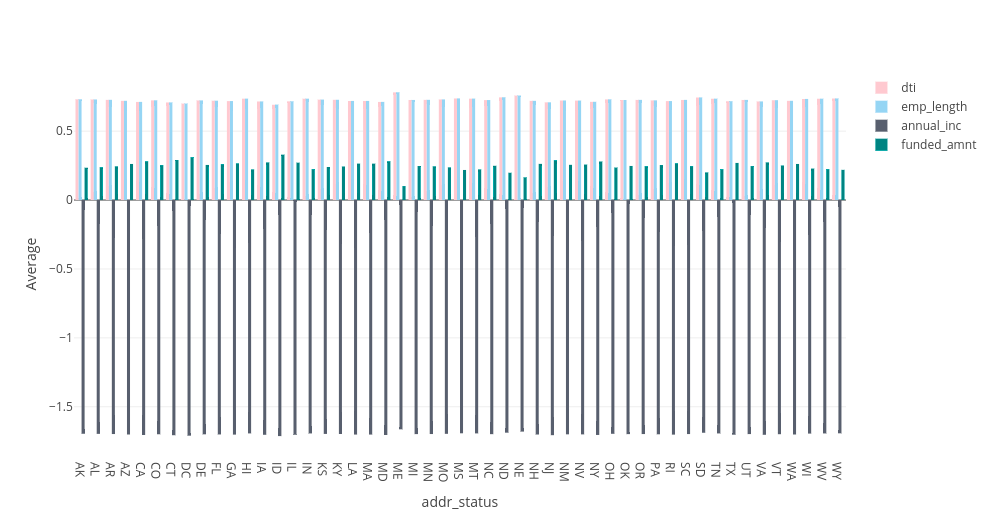

In [110]:
loan_check= pd.get_dummies(loan['addr_state'], prefix='addr')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,...,addr_SD,addr_TN,addr_TX,addr_UT,addr_VA,addr_VT,addr_WA,addr_WI,addr_WV,addr_WY
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2,77000.0,...,0,0,0,0,0,0,0,0,0,0
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5,80000.0,...,0,0,0,0,0,0,0,0,0,0
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10,22500.0,...,0,0,0,0,0,0,0,0,0,0
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10,38000.0,...,0,0,0,0,0,0,0,0,0,0
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10,78000.0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
loan.drop('addr_state', axis=1, inplace = True)

## 1-9) initial_list_status

In [112]:
print (loan.initial_list_status.value_counts())

f    144758
w     58407
Name: initial_list_status, dtype: int64


In [113]:
# one-hot-encoding
loan_check= pd.get_dummies(loan['initial_list_status'], prefix='initial')
loan = loan.join(loan_check)
loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,...,addr_TX,addr_UT,addr_VA,addr_VT,addr_WA,addr_WI,addr_WV,addr_WY,initial_f,initial_w
4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2,77000.0,...,0,0,0,0,0,0,0,0,1,0
171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5,80000.0,...,0,0,0,0,0,0,0,0,0,1
426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10,22500.0,...,0,0,0,0,0,0,0,0,0,1
54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10,38000.0,...,0,0,0,0,0,0,0,0,1,0
58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10,78000.0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
loan.drop('initial_list_status', axis = 1, inplace = True)

## 1-10) policy_code

In [115]:
loan.policy_code.value_counts()

1.0    203165
Name: policy_code, dtype: int64

In [116]:
# All values are the same, hense delete

loan.drop('policy_code', axis = 1, inplace = True)

## 1-11) application_type
* Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [117]:
loan.application_type.value_counts()

INDIVIDUAL    203162
JOINT              3
Name: application_type, dtype: int64

In [118]:
# Seems there is no meaning, remove it

loan.drop('application_type', axis = 1, inplace = True)

#### Only 3 co-borrowers have no meaning, check relative variable, and delete

In [119]:

# 'annual_inc_joint','dti_joint','verification_status_joint',
print (loan.annual_inc_joint.value_counts())
print (loan.dti_joint.value_counts())
print (loan.verification_status_joint.value_counts())



loan.drop('annual_inc_joint', axis = 1, inplace = True)
loan.drop('dti_joint', axis = 1, inplace = True)
loan.drop('verification_status_joint', axis = 1, inplace = True)

0.0         203162
108000.0         1
104800.0         1
36000.0          1
Name: annual_inc_joint, dtype: int64
0.00     203162
16.34         1
17.60         1
11.08         1
Name: dti_joint, dtype: int64
0                  203162
Not Verified            1
Verified                1
Source Verified         1
Name: verification_status_joint, dtype: int64


### Intermediate Nan Check

In [120]:

loan.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
sub_grade                      0
emp_title                      0
emp_length                     0
annual_inc                     0
issue_d                        0
purpose                        0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_acc_6m                    0
open_il_6m                     0
          

## 1-12) issue_d & earliest_cr_line
* I can calculate credit period with these features
*  earliest_cr_line ((year 12) + month) - issue_d((year 12) + month)

In [121]:
loan[['issue_d', 'earliest_cr_line']].tail()

,issue_d,earliest_cr_line
4343,Oct-2011,Dec-2004
171132,Jan-2013,Jul-2003
426521,Mar-2014,Aug-1982
54747,Dec-2013,Jul-1997
58657,Nov-2013,Jun-1990


In [122]:
loan.issue_d.isnull().value_counts()

False    203165
Name: issue_d, dtype: int64

In [123]:
# issue_d 

loan_d_list = loan['issue_d'].str.split('-').tolist()  # 대출 시작일

for i in range(0, len(loan_d_list)):
    if loan_d_list[i][0] == 'Jan':
        loan_d_list[i][0] = '01'
    elif loan_d_list[i][0] == 'Feb':
        loan_d_list[i][0] = '02'
    elif loan_d_list[i][0] == 'Mar':
        loan_d_list[i][0] = '03'
    elif loan_d_list[i][0] == 'Apr':
        loan_d_list[i][0] = '04'
    elif loan_d_list[i][0] == 'May':
        loan_d_list[i][0] = '05'
    elif loan_d_list[i][0] == 'Jun':
        loan_d_list[i][0] = '06'
    elif loan_d_list[i][0] == 'Jul':
        loan_d_list[i][0] = '07'
    elif loan_d_list[i][0] == 'Aug':
        loan_d_list[i][0] = '08'
    elif loan_d_list[i][0] == 'Sep':
        loan_d_list[i][0] = '09'
    elif loan_d_list[i][0] == 'Oct':
        loan_d_list[i][0] = '10'
    elif loan_d_list[i][0] == 'Nov':
        loan_d_list[i][0] = '11'
    elif loan_d_list[i][0] == 'Dec':
        loan_d_list[i][0] = '12'
    
    a = int(loan_d_list[i][0])  # year 와 month의 위치를 바꾼다
    loan_d_list[i][0] = int(loan_d_list[i][1]) * 12
    loan_d_list[i][1] = a
    loan_d_list[i] = loan_d_list[i][0] + loan_d_list[i][1]

    
loan_check = pd.DataFrame(loan_d_list)
loan_check.rename(columns= {0 : 'issue_d'}, inplace = True)
loan_check.tail()

,issue_d
203160,24142
203161,24157
203162,24171
203163,24168
203164,24167


In [124]:
loan_check.isnull().sum()

issue_d    0
dtype: int64

In [125]:
# earliest_cr_line 

loan_d_list = loan['earliest_cr_line'].str.split('-').tolist()  # 최초 신용거래 시작일

for i in range(0, len(loan_d_list)):
    if loan_d_list[i][0] == 'Jan':
        loan_d_list[i][0] = '01'
    elif loan_d_list[i][0] == 'Feb':
        loan_d_list[i][0] = '02'
    elif loan_d_list[i][0] == 'Mar':
        loan_d_list[i][0] = '03'
    elif loan_d_list[i][0] == 'Apr':
        loan_d_list[i][0] = '04'
    elif loan_d_list[i][0] == 'May':
        loan_d_list[i][0] = '05'
    elif loan_d_list[i][0] == 'Jun':
        loan_d_list[i][0] = '06'
    elif loan_d_list[i][0] == 'Jul':
        loan_d_list[i][0] = '07'
    elif loan_d_list[i][0] == 'Aug':
        loan_d_list[i][0] = '08'
    elif loan_d_list[i][0] == 'Sep':
        loan_d_list[i][0] = '09'
    elif loan_d_list[i][0] == 'Oct':
        loan_d_list[i][0] = '10'
    elif loan_d_list[i][0] == 'Nov':
        loan_d_list[i][0] = '11'
    elif loan_d_list[i][0] == 'Dec':
        loan_d_list[i][0] = '12'
    
    a = int(loan_d_list[i][0])  # year 와 month의 위치를 바꾼다
    loan_d_list[i][0] = int(loan_d_list[i][1]) * 12
    loan_d_list[i][1] = a
    loan_d_list[i] = loan_d_list[i][0] + loan_d_list[i][1]
    

    
loan_check['earliest_cr_line'] = pd.DataFrame(loan_d_list)
#loan_check.rename(columns= {0 : 'issue_d'}, inplace = True)
loan_check.tail()

,issue_d,earliest_cr_line
203160,24142,24060
203161,24157,24043
203162,24171,23792
203163,24168,23971
203164,24167,23886


In [126]:
loan_check.isnull().sum()

issue_d             0
earliest_cr_line    0
dtype: int64

In [127]:


# Making credit period

loan_check['credit_period'] = loan_check.issue_d - loan_check.earliest_cr_line
loan_check

,issue_d,earliest_cr_line,credit_period
0,24124,23983,141
1,24164,24008,156
2,24158,24003,155
3,24161,23883,278
4,24158,24000,158
5,24184,23982,202
6,24156,24000,156
7,24176,23997,179
8,24170,24005,165
9,24154,23743,411


In [128]:
loan.reset_index(inplace = True)

In [129]:
loan['credit_period'] = loan_check['credit_period']
loan.isnull().sum()

index                          0
id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
sub_grade                      0
emp_title                      0
emp_length                     0
annual_inc                     0
issue_d                        0
purpose                        0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_acc_6m                    0
          

In [130]:
loan.drop('earliest_cr_line', axis = 1, inplace=True)
gc.collect()

142

## 1-13)  purpose


In [131]:
loan.purpose.value_counts()


debt_consolidation    119340
credit_card            39864
home_improvement       11972
other                  11618
major_purchase          5016
small_business          3914
car                     2894
medical                 2273
moving                  1653
wedding                 1504
house                   1327
vacation                1269
educational              310
renewable_energy         211
Name: purpose, dtype: int64

In [132]:
loan_check = loan[['purpose', 'annual_inc', 'dti']]
loan_check.groupby('purpose').mean().reset_index()

,purpose,annual_inc,dti
0,car,64001.923760,12.682412
1,credit_card,71851.312047,17.125335
2,debt_consolidation,71338.231031,17.528760
3,educational,50476.682387,11.469677
4,home_improvement,90224.431957,13.848232
5,house,78966.848726,13.034378
6,major_purchase,73240.100074,12.940961
7,medical,71176.149982,15.534580
8,moving,65761.867949,14.561718
9,other,67358.949291,15.235986


In [140]:
loan_check= pd.get_dummies(loan['purpose'], prefix='pur')
loan = loan.join(loan_check)
loan.tail()

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_length,annual_inc,...,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding
203160,4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,2,77000.0,...,0,0,0,0,0,0,0,0,0,0
203161,171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,5,80000.0,...,0,0,0,0,0,0,0,0,0,0
203162,426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,10,22500.0,...,0,0,0,0,0,0,0,0,0,0
203163,54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,10,38000.0,...,0,0,0,0,0,0,0,0,0,0
203164,58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,10,78000.0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
loan.drop('purpose', axis=1, inplace=True)

## 1-14) issue_d
* Change month and apply one-hot-encoding

In [133]:
loan_d_list = loan['issue_d'].str.split('-').tolist()  # 대출 시작일

for i in range(0, len(loan_d_list)):
    loan_d_list[i][1] = 0
  
    

loan_check = pd.DataFrame(loan_d_list)
loan['issue_month'] = loan_check[0]


In [134]:
loan.isnull().sum()

index                          0
id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
sub_grade                      0
emp_title                      0
emp_length                     0
annual_inc                     0
issue_d                        0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_acc_6m                    0
open_il_6m                     0
          

In [135]:
# one-hot-encoding
loan_check= pd.get_dummies(loan['issue_month'], prefix='issue')
loan = loan.join(loan_check)
loan.tail()

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,...,issue_Dec,issue_Feb,issue_Jan,issue_Jul,issue_Jun,issue_Mar,issue_May,issue_Nov,issue_Oct,issue_Sep
203160,4343,1004123,12000.0,12000.0,12000.0,11.71,396.92,0.848689,Lockheed Martin,2,...,0,0,0,0,0,0,0,0,1,0
203161,171132,3162621,20000.0,20000.0,19800.0,12.12,665.44,0.848689,McGraw-hill companies,5,...,0,0,1,0,0,0,0,0,0,0
203162,426521,12806896,8475.0,8475.0,8475.0,18.92,310.32,0.649399,Web Developer,10,...,0,0,0,0,0,1,0,0,0,0
203163,54747,8998391,15000.0,15000.0,15000.0,17.10,535.54,0.716210,Deli/Cashier,10,...,1,0,0,0,0,0,0,0,0,0
203164,58657,9001675,16000.0,16000.0,16000.0,15.10,555.43,0.778796,Purchaing Agenet,10,...,0,0,0,0,0,0,0,1,0,0


In [136]:
loan = loan.drop(['issue_d', 'issue_month'], axis = 1)

## 1-14) emp_title
* There are vaious of company which hard to categorize. So it will be dropped

In [137]:
loan.drop('emp_title', axis =1, inplace = True)

In [138]:
loan.isnull().sum()

index                          0
id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
sub_grade                      0
emp_length                     0
annual_inc                     0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_acc_6m                    0
open_il_6m                     0
open_il_12m                    0
open_il_24m                    0
          

# 2. Export Dataframe as Pickle

In [142]:
#Test set to be pickle files
pickle.dump(loan, open( "pickle/loan2", "wb" ) )
